
<div class="alert alert-info">
    <h1 align="center", style='color:black'>Data Cleaning and Preparation</h1> 
    <h3 align="center" style='color:black'> International Graduate School of Artificial Intelligence - YunTech </h3>
    <h5 align="center">  </h5>
</div>

# <span style='color:Black'>**Why Data Preprocessing?**</span>

Data in the real world is dirty

* incomplete: lacking attribute values, lacking certain attributes of interest, or containing only aggregate data

* noisy: containing errors or outliers

* inconsistent: containing discrepancies in codes or names


# <span style='color:Black'>**Missing Data**</span>

**Data is not always available**

* E.g., many tuples have no recorded value for several attributes, such as customer income in sales data

**Missing data may be due to**

* equipment malfunction

* inconsistent with other recorded data and thus deleted

* data not entered due to misunderstanding

* certain data may not be considered important at the time of entry

* not register history or changes of the data

**Missing data may need to be inferred**


# <span style='color:Black'>**How to Handle Missing Data?**</span>

* **Ignore the tuple:**  usually done when class label is missing (assuming the task is classification—not effective in certain cases) 

* **Fill in the missing value manually**

* **Use a global constant to fill in the missing value:** e.g., “unknown”, a new class?! 

* **Use the attribute mean to fill in the missing value**

* **Use the attribute mean for all samples of the same class to fill in the missing value:** smarter

* **Use the most probable value to fill in the missing value:** inference-based such as regression, Bayesian formula, decision tree

# 1.  Importing data

So, that's pretty cool, but it's unlikely that you'll want to manually type in your whole dataset as an array or a dict.  How can we read external data into a dataframe?  Let's say we have a tab-separated text file with data from an esophageal cancer project.

In [1]:
import pandas as pd
import numpy as np

df_orig = pd.read_csv('data/esophageal_subjects.txt', sep='\t')
df_orig

,ID,Dx,AGE,SEX,C3_EDUC,C16_HFUEL,D1_EVCIG,D2_START,D4_STOP,D5_NUMCIG,D8_LIQ,E1_UGICAN,G1_TEMP,G2_SFREQ,H1_HEIGHT,H2_WEIGHT,PS_ID,WGS
0,PS002,ESCC,53.0,M,4,3.0,1,20.0,NaN,20,5,2,4,4,170,110,PS-002,R12345
1,PS003,ESCC,63.0,F,6,7.0,2,NaN,NaN,NaN,5,1,4,4,161,56,PS-003,R12346
2,PS005,HGIN,59.0,F,4,4.0,2,NaN,NaN,NaN,5,2,4,3,159,63,PS-005,R12347
3,PS007,ESCC,69.0,F,5,7.0,2,NaN,NaN,NaN,5,2,4,4,160,110,PS-007,R12348
4,PS007,ESCC,69.0,F,5,7.0,2,NaN,NaN,NaN,5,2,4,4,160,110,PS-007,R12348
5,PS013,ESCC,67.0,M,.,7.0,1,36.0,57.0,20,1,2,2,2,184,180,PS-013,R1223
6,PS015,HGIN,59.0,M,4,7.0,1,18.0,57.0,15,1,1,2,1,176,150,PS-019,R1224
7,PS018,HGIN,58.0,M,3,4.0,1,26.0,58.0,20,1,2,3,4,170,156,PS-021,R1225
8,PS019,HGIN,59.0,M,6,7.0,1,22.0,55.0,20,1,None,3,4,172,130,PS-024,R1226
9,PS020,HGIN,NaN,M,6,7.0,1,22.0,65.0,30,1,NaN,3,4,177,150,PS-026,R1227


# 2.  Viewing the dataframe

In [3]:
df_orig.head()

,ID,Dx,AGE,SEX,C3_EDUC,C16_HFUEL,D1_EVCIG,D2_START,D4_STOP,D5_NUMCIG,D8_LIQ,E1_UGICAN,G1_TEMP,G2_SFREQ,H1_HEIGHT,H2_WEIGHT,PS_ID,WGS
0,PS002,ESCC,53.0,M,4,3.0,1,20.0,NaN,20,5,2,4,4,170,110,PS-002,R12345
1,PS003,ESCC,63.0,F,6,7.0,2,NaN,NaN,NaN,5,1,4,4,161,56,PS-003,R12346
2,PS005,HGIN,59.0,F,4,4.0,2,NaN,NaN,NaN,5,2,4,3,159,63,PS-005,R12347
3,PS007,ESCC,69.0,F,5,7.0,2,NaN,NaN,NaN,5,2,4,4,160,110,PS-007,R12348
4,PS007,ESCC,69.0,F,5,7.0,2,NaN,NaN,NaN,5,2,4,4,160,110,PS-007,R12348


In [4]:
df_orig.head(10)

,ID,Dx,AGE,SEX,C3_EDUC,C16_HFUEL,D1_EVCIG,D2_START,D4_STOP,D5_NUMCIG,D8_LIQ,E1_UGICAN,G1_TEMP,G2_SFREQ,H1_HEIGHT,H2_WEIGHT,PS_ID,WGS
0,PS002,ESCC,53.0,M,4,3.0,1,20.0,NaN,20,5,2,4,4,170,110,PS-002,R12345
1,PS003,ESCC,63.0,F,6,7.0,2,NaN,NaN,NaN,5,1,4,4,161,56,PS-003,R12346
2,PS005,HGIN,59.0,F,4,4.0,2,NaN,NaN,NaN,5,2,4,3,159,63,PS-005,R12347
3,PS007,ESCC,69.0,F,5,7.0,2,NaN,NaN,NaN,5,2,4,4,160,110,PS-007,R12348
4,PS007,ESCC,69.0,F,5,7.0,2,NaN,NaN,NaN,5,2,4,4,160,110,PS-007,R12348
5,PS013,ESCC,67.0,M,.,7.0,1,36.0,57.0,20,1,2,2,2,184,180,PS-013,R1223
6,PS015,HGIN,59.0,M,4,7.0,1,18.0,57.0,15,1,1,2,1,176,150,PS-019,R1224
7,PS018,HGIN,58.0,M,3,4.0,1,26.0,58.0,20,1,2,3,4,170,156,PS-021,R1225
8,PS019,HGIN,59.0,M,6,7.0,1,22.0,55.0,20,1,None,3,4,172,130,PS-024,R1226
9,PS020,HGIN,NaN,M,6,7.0,1,22.0,65.0,30,1,NaN,3,4,177,150,PS-026,R1227


In [5]:
df_orig.tail()

,ID,Dx,AGE,SEX,C3_EDUC,C16_HFUEL,D1_EVCIG,D2_START,D4_STOP,D5_NUMCIG,D8_LIQ,E1_UGICAN,G1_TEMP,G2_SFREQ,H1_HEIGHT,H2_WEIGHT,PS_ID,WGS
29,PS054,HGIN,63.0,M,4,3.0,2,NaN,NaN,NaN,5,2,4,4,170,63,PS-036,R126R
30,PS066,HGIN,NaN,M,5,7.0,1,18.0,59.0,6,1,2,4,4,180,70,PS-037,R126S
31,PS067,ESCC,68.0,M,5,7.0,1,25.0,35.0,20,1,1,4,4,173,63,PS-020,R126T
32,PS068,ESCC,53.0,M,6,1.0,1,22.0,53.0,35,1,1,4,4,176,93,PS-054,R126U
33,PS070,HGIN,59.0,M,6,1.0,1,20.0,59.0,20,1,1,4,3,170,79,PS-070,R126V


In [6]:
df_orig.shape

(34, 18)

In [7]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         34 non-null     object 
 1   Dx         34 non-null     object 
 2   AGE        31 non-null     float64
 3   SEX        32 non-null     object 
 4   C3_EDUC    34 non-null     object 
 5   C16_HFUEL  33 non-null     float64
 6   D1_EVCIG   34 non-null     int64  
 7   D2_START   26 non-null     float64
 8   D4_STOP    25 non-null     float64
 9   D5_NUMCIG  28 non-null     object 
 10  D8_LIQ     34 non-null     int64  
 11  E1_UGICAN  30 non-null     object 
 12  G1_TEMP    34 non-null     int64  
 13  G2_SFREQ   34 non-null     int64  
 14  H1_HEIGHT  34 non-null     int64  
 15  H2_WEIGHT  34 non-null     int64  
 16  PS_ID      34 non-null     object 
 17  WGS        34 non-null     object 
dtypes: float64(4), int64(6), object(8)
memory usage: 4.9+ KB


Note the data types reported above.  For example, 'C3_EDUC' looks like a column of numbers, but the dtype is reported as "object", which is a string.  This is a clue that something might be awry in this column (for example, there may be a missing value that is noted with a string like 'na').

Count non-null values by column.

In [8]:
df_orig.count()

ID           34
Dx           34
AGE          31
SEX          32
C3_EDUC      34
C16_HFUEL    33
D1_EVCIG     34
D2_START     26
D4_STOP      25
D5_NUMCIG    28
D8_LIQ       34
E1_UGICAN    30
G1_TEMP      34
G2_SFREQ     34
H1_HEIGHT    34
H2_WEIGHT    34
PS_ID        34
WGS          34
dtype: int64

Count distinct values by column.  Check here that columns have the expected number of unique values, e.g. two values for sex.

In [9]:
df_orig.nunique()

ID           33
Dx            4
AGE          19
SEX           2
C3_EDUC       6
C16_HFUEL     5
D1_EVCIG      2
D2_START      8
D4_STOP      15
D5_NUMCIG    11
D8_LIQ        5
E1_UGICAN     3
G1_TEMP       3
G2_SFREQ      4
H1_HEIGHT    16
H2_WEIGHT    20
PS_ID        33
WGS          33
dtype: int64

# 3.  Slicing and extracting data

You will see some of these techniques in action shortly, but let's take a moment for an introduction.  You can subset a dataframe in several ways, and the subsetted data can be either a dataframe or a series.  

First, let's subset by column name.  Notice that this results in a series.

In [10]:
df_orig['AGE']

0     53.0
1     63.0
2     59.0
3     69.0
4     69.0
5     67.0
6     59.0
7     58.0
8     59.0
9      NaN
10    63.0
11    50.0
12    64.0
13    66.0
14    54.0
15    60.0
16    59.0
17    56.0
18    47.0
19    48.0
20     NaN
21    53.0
22    53.0
23    51.0
24    67.0
25    62.0
26    72.0
27    67.0
28    52.0
29    63.0
30     NaN
31    68.0
32    53.0
33    59.0
Name: AGE, dtype: float64

In [11]:
type(df_orig['AGE'])

pandas.core.series.Series

You can subset by column name and get a dataframe by passing a list.

In [12]:
df_orig[['AGE']]

,AGE
0,53.0
1,63.0
2,59.0
3,69.0
4,69.0
5,67.0
6,59.0
7,58.0
8,59.0
9,NaN


In [13]:
type(df_orig[['AGE']])

pandas.core.frame.DataFrame

You can easily subset a dataframe by multiple columns, by adding column names to the list.

In [14]:
df_orig[['AGE','H2_WEIGHT']]

,AGE,H2_WEIGHT
0,53.0,110
1,63.0,56
2,59.0,63
3,69.0,110
4,69.0,110
5,67.0,180
6,59.0,150
7,58.0,156
8,59.0,130
9,NaN,150


You can also extract data from rows in the dataframe by index or by label, using `.loc` and `.iloc`. 

In [15]:
df_orig.loc[0]  # if we had set data labels other than index number, we would use df_orig.loc['myRowLabel'] here.

ID            PS002
Dx             ESCC
AGE            53.0
SEX               M
C3_EDUC           4
C16_HFUEL       3.0
D1_EVCIG          1
D2_START       20.0
D4_STOP         NaN
D5_NUMCIG        20
D8_LIQ            5
E1_UGICAN         2
G1_TEMP           4
G2_SFREQ          4
H1_HEIGHT       170
H2_WEIGHT       110
PS_ID        PS-002
WGS          R12345
Name: 0, dtype: object

In [16]:
df_orig.iloc[0]

ID            PS002
Dx             ESCC
AGE            53.0
SEX               M
C3_EDUC           4
C16_HFUEL       3.0
D1_EVCIG          1
D2_START       20.0
D4_STOP         NaN
D5_NUMCIG        20
D8_LIQ            5
E1_UGICAN         2
G1_TEMP           4
G2_SFREQ          4
H1_HEIGHT       170
H2_WEIGHT       110
PS_ID        PS-002
WGS          R12345
Name: 0, dtype: object

# 4.  Clean up the data

## 4.1.  Remove duplicate values

You may want to check your data for duplicate entries.  Using `drop_duplicates()`, we can remove all duplicate rows, or keep only the first or last row of a set of duplicates.  Here, we remove a row in which all values are duplicates of another row.

In [17]:
df_clean = df_orig.copy()
df_clean.head()

,ID,Dx,AGE,SEX,C3_EDUC,C16_HFUEL,D1_EVCIG,D2_START,D4_STOP,D5_NUMCIG,D8_LIQ,E1_UGICAN,G1_TEMP,G2_SFREQ,H1_HEIGHT,H2_WEIGHT,PS_ID,WGS
0,PS002,ESCC,53.0,M,4,3.0,1,20.0,NaN,20,5,2,4,4,170,110,PS-002,R12345
1,PS003,ESCC,63.0,F,6,7.0,2,NaN,NaN,NaN,5,1,4,4,161,56,PS-003,R12346
2,PS005,HGIN,59.0,F,4,4.0,2,NaN,NaN,NaN,5,2,4,3,159,63,PS-005,R12347
3,PS007,ESCC,69.0,F,5,7.0,2,NaN,NaN,NaN,5,2,4,4,160,110,PS-007,R12348
4,PS007,ESCC,69.0,F,5,7.0,2,NaN,NaN,NaN,5,2,4,4,160,110,PS-007,R12348


In [18]:
df_clean.sort_values("ID", inplace = True)
df_clean.drop_duplicates(keep = 'first', inplace = True)

In [19]:
df_clean.shape

(33, 18)

We can also remove duplicates based on specific values, like "Dx".  In this example, we keep only the last row of each duplicate diagnosis.

In [20]:
df_Dx = df_clean.sort_values('Dx')
df_Dx.drop_duplicates(subset = 'Dx', keep = 'last', inplace = True)
df_Dx.shape

(4, 18)

In [21]:
df_Dx

,ID,Dx,AGE,SEX,C3_EDUC,C16_HFUEL,D1_EVCIG,D2_START,D4_STOP,D5_NUMCIG,D8_LIQ,E1_UGICAN,G1_TEMP,G2_SFREQ,H1_HEIGHT,H2_WEIGHT,PS_ID,WGS
14,PS028,Adenosq,54.0,M,4,1.0,1,18.0,54.0,60,2,2,4,4,175,150,PS-033,R126C
26,PS047,Adenosq_ESCC,72.0,M,5,1.0,2,NaN,NaN,NaN,4,1,2,1,183,88,PS-015,R126O
13,PS026,ESCC,66.0,F,3,7.0,2,NaN,NaN,None,5,2,2,1,160,45,PS-032,R126B
33,PS070,HGIN,59.0,M,6,1.0,1,20.0,59.0,20,1,1,4,3,170,79,PS-070,R126V


__Exercise: Copy the dataframe df_orig, sort the copy by sex, drop all but the first duplicates, and determine the shape__

In [22]:
df_exercise = df_orig.copy()
df_exercise.sort_values('SEX',inplace=True)
df_exercise.drop_duplicates(subset='SEX', keep='first',inplace=True)
df_exercise.shape

(3, 18)

## 4.2.  Modify column headings and row labels

Let's look at the column headings in our data.

In [23]:
df_clean.columns

Index(['ID', 'Dx', 'AGE', 'SEX', 'C3_EDUC', 'C16_HFUEL', 'D1_EVCIG',
       'D2_START', 'D4_STOP', 'D5_NUMCIG', 'D8_LIQ', 'E1_UGICAN', 'G1_TEMP',
       'G2_SFREQ', 'H1_HEIGHT', 'H2_WEIGHT', 'PS_ID', 'WGS'],
      dtype='object')

The columns headings on our imported data are difficult to interpret.  Let's change them to something that makes more sense.

In [24]:
df_clean.rename(columns={'C3_EDUC':'Education_level',
                   'C16_HFUEL':'Heating_source',
                   'D1_EVCIG':'Smoke_6mos',
                   'D2_START':'Age_start_smoking',
                   'D4_STOP':'Age_stop_smoking',
                   'D5_NUMCIG':'Cigarettes_per_day',
                   'D8_LIQ':'Liquor_freq',
                   'E1_UGICAN':'Family_hx_UGIcancer',
                   'G1_TEMP':'Temp_of_hot_beverages',
                   'G2_SFREQ':'Frequency_scalding_food',
                   'H1_HEIGHT':'Height_cm',
                   'H2_WEIGHT':'Weight_kg'},
         inplace=True)

In [25]:
df_clean.head()

,ID,Dx,AGE,SEX,Education_level,Heating_source,Smoke_6mos,Age_start_smoking,Age_stop_smoking,Cigarettes_per_day,Liquor_freq,Family_hx_UGIcancer,Temp_of_hot_beverages,Frequency_scalding_food,Height_cm,Weight_kg,PS_ID,WGS
0,PS002,ESCC,53.0,M,4,3.0,1,20.0,NaN,20,5,2,4,4,170,110,PS-002,R12345
1,PS003,ESCC,63.0,F,6,7.0,2,NaN,NaN,NaN,5,1,4,4,161,56,PS-003,R12346
2,PS005,HGIN,59.0,F,4,4.0,2,NaN,NaN,NaN,5,2,4,3,159,63,PS-005,R12347
3,PS007,ESCC,69.0,F,5,7.0,2,NaN,NaN,NaN,5,2,4,4,160,110,PS-007,R12348
5,PS013,ESCC,67.0,M,.,7.0,1,36.0,57.0,20,1,2,2,2,184,180,PS-013,R1223


We could also change the column headings using `.columns`.  Let's say we wanted a dataframe with only lowercase column headings.

In [26]:
df_clean.columns = ['id', 'dx', 'age', 'sex', 'education_level', 'heating_source',
       'smoke_6mos', 'age_start_smoking', 'age_stop_smoking',
       'cigarettes_per_day', 'liquor_freq', 'family_hx_ugicancer',
       'temp_of_hot_beverages', 'frequency_scalding_food', 'height_cm',
       'weight_kg', 'ps_id', 'wgs']

In [27]:
df_clean.head()

,id,dx,age,sex,education_level,heating_source,smoke_6mos,age_start_smoking,age_stop_smoking,cigarettes_per_day,liquor_freq,family_hx_ugicancer,temp_of_hot_beverages,frequency_scalding_food,height_cm,weight_kg,ps_id,wgs
0,PS002,ESCC,53.0,M,4,3.0,1,20.0,NaN,20,5,2,4,4,170,110,PS-002,R12345
1,PS003,ESCC,63.0,F,6,7.0,2,NaN,NaN,NaN,5,1,4,4,161,56,PS-003,R12346
2,PS005,HGIN,59.0,F,4,4.0,2,NaN,NaN,NaN,5,2,4,3,159,63,PS-005,R12347
3,PS007,ESCC,69.0,F,5,7.0,2,NaN,NaN,NaN,5,2,4,4,160,110,PS-007,R12348
5,PS013,ESCC,67.0,M,.,7.0,1,36.0,57.0,20,1,2,2,2,184,180,PS-013,R1223


Our row labels right now are just numbered, i.e. 0,1,2...  Let's change the row labels to the patient IDs.

In [28]:
df_clean.set_index('id', inplace=True)

In [29]:
df_clean.head()

,dx,age,sex,education_level,heating_source,smoke_6mos,age_start_smoking,age_stop_smoking,cigarettes_per_day,liquor_freq,family_hx_ugicancer,temp_of_hot_beverages,frequency_scalding_food,height_cm,weight_kg,ps_id,wgs
id,,,,,,,,,,,,,,,,,
PS002,ESCC,53.0,M,4,3.0,1,20.0,NaN,20,5,2,4,4,170,110,PS-002,R12345
PS003,ESCC,63.0,F,6,7.0,2,NaN,NaN,NaN,5,1,4,4,161,56,PS-003,R12346
PS005,HGIN,59.0,F,4,4.0,2,NaN,NaN,NaN,5,2,4,3,159,63,PS-005,R12347
PS007,ESCC,69.0,F,5,7.0,2,NaN,NaN,NaN,5,2,4,4,160,110,PS-007,R12348
PS013,ESCC,67.0,M,.,7.0,1,36.0,57.0,20,1,2,2,2,184,180,PS-013,R1223


## 4.3.  Re-coding data

This data has many encoded values, e.g. integers that represent various levels of education, heating fuel types, etc.  Let's replace the encoded data with the real data.

In [30]:
df_clean.columns

Index(['dx', 'age', 'sex', 'education_level', 'heating_source', 'smoke_6mos',
       'age_start_smoking', 'age_stop_smoking', 'cigarettes_per_day',
       'liquor_freq', 'family_hx_ugicancer', 'temp_of_hot_beverages',
       'frequency_scalding_food', 'height_cm', 'weight_kg', 'ps_id', 'wgs'],
      dtype='object')

In [31]:
df_clean['education_level'].replace(['1','2','3','4','5','6','7'],['None','1-5yrs','Primary','Middle','High','College','Other'], inplace=True)
df_clean['heating_source'].replace([1,2,3,4,5,6,7,8],['Coal','Coke','Coal_product','Firewood','Diesel','Kerosene','Gas','Other'], inplace=True)
df_clean['smoke_6mos'].replace([1,2],['Yes','No'], inplace=True)
df_clean['liquor_freq'].replace([1,2,3,4,5],['Daily','Weekly','Monthly','Seasonally','Rarely-never'], inplace = True)
df_clean['family_hx_ugicancer'].replace(['1','2'],['Yes','No'], inplace = True)
df_clean['temp_of_hot_beverages'].replace([1,2,3,4,9],['Cool','Warm','Hot','Scalding','DK'], inplace=True)
df_clean['frequency_scalding_food'].replace([1,2,3,4,9],['Seldom-never','Occasionally','Weekly','Daily','DK'], inplace=True)

What's the deal with `[1,2,3,]` vs. `['1','2','3']` above?  Recall the result of `.info()`.  Columns that contain only integers like 1,2,3 are of an integer dtype.  However, if there are mixed types within the column (e.g. a missing value like '.' or 'Nan'), then the column will be an object type, which are strings.

In [32]:
df_clean.head()

,dx,age,sex,education_level,heating_source,smoke_6mos,age_start_smoking,age_stop_smoking,cigarettes_per_day,liquor_freq,family_hx_ugicancer,temp_of_hot_beverages,frequency_scalding_food,height_cm,weight_kg,ps_id,wgs
id,,,,,,,,,,,,,,,,,
PS002,ESCC,53.0,M,Middle,Coal_product,Yes,20.0,NaN,20,Rarely-never,No,Scalding,Daily,170,110,PS-002,R12345
PS003,ESCC,63.0,F,College,Gas,No,NaN,NaN,NaN,Rarely-never,Yes,Scalding,Daily,161,56,PS-003,R12346
PS005,HGIN,59.0,F,Middle,Firewood,No,NaN,NaN,NaN,Rarely-never,No,Scalding,Weekly,159,63,PS-005,R12347
PS007,ESCC,69.0,F,High,Gas,No,NaN,NaN,NaN,Rarely-never,No,Scalding,Daily,160,110,PS-007,R12348
PS013,ESCC,67.0,M,.,Gas,Yes,36.0,57.0,20,Daily,No,Warm,Occasionally,184,180,PS-013,R1223


__Exercise: Copy df_clean and replace 'M' and 'F' with 'male' and 'female', then show the first 5 rows__

In [33]:
df_ex2 = df_clean.copy()
df_ex2['sex'].replace(['M','F'],['male','female'],inplace=True)
df_ex2.head()

,dx,age,sex,education_level,heating_source,smoke_6mos,age_start_smoking,age_stop_smoking,cigarettes_per_day,liquor_freq,family_hx_ugicancer,temp_of_hot_beverages,frequency_scalding_food,height_cm,weight_kg,ps_id,wgs
id,,,,,,,,,,,,,,,,,
PS002,ESCC,53.0,male,Middle,Coal_product,Yes,20.0,NaN,20,Rarely-never,No,Scalding,Daily,170,110,PS-002,R12345
PS003,ESCC,63.0,female,College,Gas,No,NaN,NaN,NaN,Rarely-never,Yes,Scalding,Daily,161,56,PS-003,R12346
PS005,HGIN,59.0,female,Middle,Firewood,No,NaN,NaN,NaN,Rarely-never,No,Scalding,Weekly,159,63,PS-005,R12347
PS007,ESCC,69.0,female,High,Gas,No,NaN,NaN,NaN,Rarely-never,No,Scalding,Daily,160,110,PS-007,R12348
PS013,ESCC,67.0,male,.,Gas,Yes,36.0,57.0,20,Daily,No,Warm,Occasionally,184,180,PS-013,R1223


## 4.4.  Missing values

Datasets often have missing values.  These can be annotated in a variety of ways - 'None', 'NaN', 'na', '.', a blank space...  These must first be identified.  Then, we can either drop the relevant rows/columns, or replace the missing values with something (often the mean or median of the column).  Some pandas techniques will handle missing values by simply omitting them from the calculation, so depending on what you're doing, you may be able to tolerate some missingness.

In [34]:
df_clean.isnull()

,dx,age,sex,education_level,heating_source,smoke_6mos,age_start_smoking,age_stop_smoking,cigarettes_per_day,liquor_freq,family_hx_ugicancer,temp_of_hot_beverages,frequency_scalding_food,height_cm,weight_kg,ps_id,wgs
id,,,,,,,,,,,,,,,,,
PS002,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
PS003,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False
PS005,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False
PS007,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False
PS013,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
PS015,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
PS018,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
PS019,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
PS020,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [35]:
df_clean.isnull().sum()

dx                         0
age                        3
sex                        2
education_level            0
heating_source             1
smoke_6mos                 0
age_start_smoking          7
age_stop_smoking           8
cigarettes_per_day         5
liquor_freq                0
family_hx_ugicancer        4
temp_of_hot_beverages      0
frequency_scalding_food    0
height_cm                  0
weight_kg                  0
ps_id                      0
wgs                        0
dtype: int64

In [36]:
df_clean.isnull().sum(axis=1)

id
PS002    1
PS003    3
PS005    3
PS007    3
PS013    0
PS015    0
PS018    0
PS019    0
PS020    2
PS021    0
PS024    3
PS025    3
PS026    2
PS028    0
PS030    0
PS031    0
PS032    0
PS033    0
PS034    0
PS035    1
PS036    0
PS037    0
PS039    1
PS042    0
PS046    0
PS047    3
PS049    0
PS051    1
PS054    3
PS066    1
PS067    0
PS068    0
PS070    0
dtype: int64

Let's take a closer look.  What type of "missing" values does `isnull()` detect?

In [37]:
df_clean['education_level']

id
PS002     Middle
PS003    College
PS005     Middle
PS007       High
PS013          .
PS015     Middle
PS018    Primary
PS019    College
PS020    College
PS021     Middle
PS024    Primary
PS025       High
PS026    Primary
PS028     Middle
PS030     Middle
PS031       High
PS032    College
PS033       High
PS034         --
PS035     Middle
PS036     Middle
PS037       High
PS039     Middle
PS042     Middle
PS046    Primary
PS047       High
PS049    Primary
PS051    College
PS054     Middle
PS066       High
PS067       High
PS068    College
PS070    College
Name: education_level, dtype: object

In [38]:
df_clean['education_level'].isnull().sum()

0

Hmm...`isnull()` doesn't recognize all of our missing values.  We'll need to address this by normalizing all the missing values that we can find.

In [39]:
df_clean.replace(['None','.','--','na'],np.nan, inplace=True)

In [40]:
df_clean['education_level']

id
PS002     Middle
PS003    College
PS005     Middle
PS007       High
PS013        NaN
PS015     Middle
PS018    Primary
PS019    College
PS020    College
PS021     Middle
PS024    Primary
PS025       High
PS026    Primary
PS028     Middle
PS030     Middle
PS031       High
PS032    College
PS033       High
PS034        NaN
PS035     Middle
PS036     Middle
PS037       High
PS039     Middle
PS042     Middle
PS046    Primary
PS047       High
PS049    Primary
PS051    College
PS054     Middle
PS066       High
PS067       High
PS068    College
PS070    College
Name: education_level, dtype: object

In [41]:
df_clean.isnull().sum()

dx                         0
age                        3
sex                        2
education_level            2
heating_source             1
smoke_6mos                 0
age_start_smoking          7
age_stop_smoking           8
cigarettes_per_day         7
liquor_freq                0
family_hx_ugicancer        5
temp_of_hot_beverages      0
frequency_scalding_food    0
height_cm                  0
weight_kg                  0
ps_id                      0
wgs                        0
dtype: int64

Great, now we can detect all our missing values.  Let's deal with missing data for the smoking-related columns.  First, let's make sure that the missing data in 'age_start_smoking' and 'age_stop_smoking' isn't due to that subject being a non-smoker.  How do we pull out all rows where any of the smoking-related columns are NaN?

In [42]:
df_clean[['smoke_6mos','age_start_smoking','age_stop_smoking','cigarettes_per_day']].isnull()

,smoke_6mos,age_start_smoking,age_stop_smoking,cigarettes_per_day
id,,,,
PS002,False,False,True,False
PS003,False,True,True,True
PS005,False,True,True,True
PS007,False,True,True,True
PS013,False,False,False,False
PS015,False,False,False,False
PS018,False,False,False,False
PS019,False,False,False,False
PS020,False,False,False,False


In [43]:
df_clean[['smoke_6mos','age_start_smoking','age_stop_smoking','cigarettes_per_day']].isnull().any(axis=1)

id
PS002     True
PS003     True
PS005     True
PS007     True
PS013    False
PS015    False
PS018    False
PS019    False
PS020    False
PS021    False
PS024    False
PS025     True
PS026     True
PS028    False
PS030    False
PS031    False
PS032    False
PS033    False
PS034    False
PS035    False
PS036    False
PS037    False
PS039    False
PS042    False
PS046    False
PS047     True
PS049    False
PS051    False
PS054     True
PS066    False
PS067    False
PS068    False
PS070    False
dtype: bool

In [44]:
df_clean[df_clean[['smoke_6mos','age_start_smoking','age_stop_smoking','cigarettes_per_day']].isnull().any(axis=1)]

,dx,age,sex,education_level,heating_source,smoke_6mos,age_start_smoking,age_stop_smoking,cigarettes_per_day,liquor_freq,family_hx_ugicancer,temp_of_hot_beverages,frequency_scalding_food,height_cm,weight_kg,ps_id,wgs
id,,,,,,,,,,,,,,,,,
PS002,ESCC,53.0,M,Middle,Coal_product,Yes,20.0,NaN,20,Rarely-never,No,Scalding,Daily,170,110,PS-002,R12345
PS003,ESCC,63.0,F,College,Gas,No,NaN,NaN,NaN,Rarely-never,Yes,Scalding,Daily,161,56,PS-003,R12346
PS005,HGIN,59.0,F,Middle,Firewood,No,NaN,NaN,NaN,Rarely-never,No,Scalding,Weekly,159,63,PS-005,R12347
PS007,ESCC,69.0,F,High,Gas,No,NaN,NaN,NaN,Rarely-never,No,Scalding,Daily,160,110,PS-007,R12348
PS025,HGIN,64.0,M,High,Gas,No,NaN,NaN,NaN,Weekly,NaN,Warm,Daily,167,63,PS-031,R126A
PS026,ESCC,66.0,F,Primary,Gas,No,NaN,NaN,NaN,Rarely-never,No,Warm,Seldom-never,160,45,PS-032,R126B
PS047,Adenosq_ESCC,72.0,M,High,Coal,No,NaN,NaN,NaN,Seasonally,Yes,Warm,Seldom-never,183,88,PS-015,R126O
PS054,HGIN,63.0,M,Middle,Coal_product,No,NaN,NaN,NaN,Rarely-never,No,Scalding,Daily,170,63,PS-036,R126R


Looks like most of the missing data in these columns is because the individual was not a smoker.  Let's replace the one valid missing data field with the column mean.

In [45]:
stop_mean = round(df_clean['age_stop_smoking'].mean())
stop_mean

53

In [46]:
df_clean.at['PS002','age_stop_smoking']=stop_mean

In [47]:
df_clean.loc[['PS002']]

,dx,age,sex,education_level,heating_source,smoke_6mos,age_start_smoking,age_stop_smoking,cigarettes_per_day,liquor_freq,family_hx_ugicancer,temp_of_hot_beverages,frequency_scalding_food,height_cm,weight_kg,ps_id,wgs
id,,,,,,,,,,,,,,,,,
PS002,ESCC,53.0,M,Middle,Coal_product,Yes,20.0,53.0,20,Rarely-never,No,Scalding,Daily,170,110,PS-002,R12345


Now, let's impute the missing values for age by replacing with the column mean.

In [48]:
age_mean = round(df_clean['age'].mean())
age_mean

59

In [49]:
df_clean['age'].fillna(age_mean, inplace=True)

In [50]:
df_clean.isnull().sum()

dx                         0
age                        0
sex                        2
education_level            2
heating_source             1
smoke_6mos                 0
age_start_smoking          7
age_stop_smoking           7
cigarettes_per_day         7
liquor_freq                0
family_hx_ugicancer        5
temp_of_hot_beverages      0
frequency_scalding_food    0
height_cm                  0
weight_kg                  0
ps_id                      0
wgs                        0
dtype: int64

We could also opt to remove some data, either rows or columns, if there are missing values.

In [51]:
df_drop = df_clean.dropna() # drop rows
df_drop.shape

(19, 17)

In [52]:
df_drop

,dx,age,sex,education_level,heating_source,smoke_6mos,age_start_smoking,age_stop_smoking,cigarettes_per_day,liquor_freq,family_hx_ugicancer,temp_of_hot_beverages,frequency_scalding_food,height_cm,weight_kg,ps_id,wgs
id,,,,,,,,,,,,,,,,,
PS002,ESCC,53.0,M,Middle,Coal_product,Yes,20.0,53.0,20,Rarely-never,No,Scalding,Daily,170,110,PS-002,R12345
PS015,HGIN,59.0,M,Middle,Gas,Yes,18.0,57.0,15,Daily,Yes,Warm,Seldom-never,176,150,PS-019,R1224
PS018,HGIN,58.0,M,Primary,Firewood,Yes,26.0,58.0,20,Daily,No,Hot,Daily,170,156,PS-021,R1225
PS021,HGIN,63.0,M,Middle,Gas,Yes,20.0,63.0,20,Daily,No,Warm,Seldom-never,773,75,PS-028,R1228
PS028,Adenosq,54.0,M,Middle,Coal,Yes,18.0,54.0,60,Weekly,No,Scalding,Daily,175,150,PS-033,R126C
PS030,ESCC,60.0,M,Middle,Gas,Yes,18.0,30.0,40,Seasonally,No,Scalding,Daily,173,140,PS-034,R126D
PS031,ESCC,59.0,M,High,Gas,Yes,20.0,55.0,20,Weekly,No,Hot,Daily,173,75,PS-035,R126E
PS032,ESCC,56.0,M,College,Gas,Yes,24.0,55.0,20,Monthly,No,Scalding,Weekly,175,80,PS-039,R126F
PS033,HGIN,47.0,M,High,Coal,Yes,25.0,45.0,8,Daily,No,Scalding,Daily,180,85,PS-042,R126G


__Exercise: We used the mean of 'age' to fill in missing values in df_clean.  What if we wanted to use the median?__

In [53]:
age_median = round(df_clean['age'].median())
df_clean['age'].fillna(age_median, inplace=True)

## 4.5.  Check for biologically unrealistic values

Sometimes, a value isn't technically missing, but it's clearly outside realistic expectations.  Let's check for examples of this.

In [54]:
df_clean['age'].describe()

count    33.000000
mean     59.121212
std       6.401941
min      47.000000
25%      53.000000
50%      59.000000
75%      63.000000
max      72.000000
Name: age, dtype: float64

In [55]:
df_clean['height_cm'].describe()

count     33.00000
mean     190.69697
std      104.71792
min      159.00000
25%      170.00000
50%      173.00000
75%      177.00000
max      773.00000
Name: height_cm, dtype: float64

In [56]:
df_clean['weight_kg'].describe()

count     33.000000
mean      93.121212
std       38.733672
min        5.000000
25%       72.000000
50%       79.000000
75%      130.000000
max      180.000000
Name: weight_kg, dtype: float64

Uh oh!  It seems unlikely that someone would be 773 cm tall, or weigh 5 kg.  Look at a few quick plots to make sure there aren't other aberrant values like this.

In [57]:
import matplotlib.pyplot as plt

<AxesSubplot:>

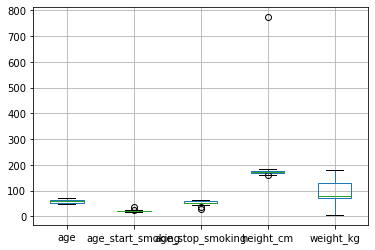

In [58]:
df_clean.boxplot()

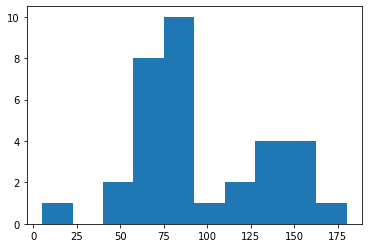

In [59]:
temp = df_clean['weight_kg']
plt.hist(temp)
plt.show()

<AxesSubplot:>

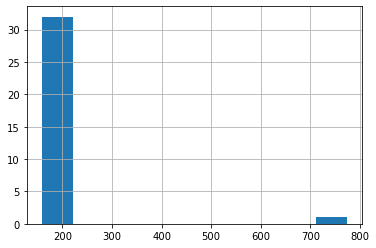

In [60]:
df_clean['height_cm'].hist()

Looks like those two are the only obviously incorrect values.  Let's replace them with the mean (excluding the outlier) of the columns.

In [61]:
df_clean['height_cm'].replace(773, np.nan, inplace=True)

In [62]:
height_mean = round(df_clean['height_cm'].mean())
height_mean

172

In [63]:
df_clean['height_cm'].replace(np.nan, height_mean, inplace=True)

In [64]:
df_clean['weight_kg'].replace(5, np.nan, inplace=True)

In [65]:
weight_mean = round(df_clean['weight_kg'].mean())
weight_mean

96

In [66]:
df_clean['weight_kg'].replace(np.nan, weight_mean, inplace=True)

Now let's re-check the distributions, to make sure everything looks plausible.

<AxesSubplot:>

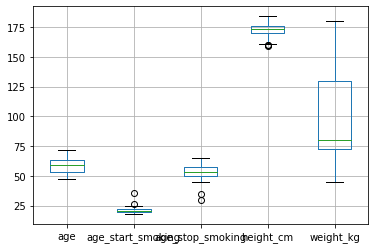

In [67]:
df_clean.boxplot()

__Exercise: Take a closer look at the 'age' data by plotting a histogram.__

<AxesSubplot:>

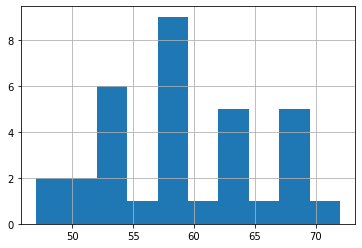

In [68]:
df_clean['age'].hist()

## 4.6  Data types

Now that we've done a lot of work cleaning our data, let's make sure each column contains the expected data type.

In [69]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, PS002 to PS070
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dx                       33 non-null     object 
 1   age                      33 non-null     float64
 2   sex                      31 non-null     object 
 3   education_level          31 non-null     object 
 4   heating_source           32 non-null     object 
 5   smoke_6mos               33 non-null     object 
 6   age_start_smoking        26 non-null     float64
 7   age_stop_smoking         26 non-null     float64
 8   cigarettes_per_day       26 non-null     object 
 9   liquor_freq              33 non-null     object 
 10  family_hx_ugicancer      28 non-null     object 
 11  temp_of_hot_beverages    33 non-null     object 
 12  frequency_scalding_food  33 non-null     object 
 13  height_cm                33 non-null     float64
 14  weight_kg                3

The column 'cigarettes_per_day' is listed as object, which is a string type.  Why?

In [70]:
df_clean['cigarettes_per_day'].value_counts()

20    13
40     4
30     2
15     1
60     1
8      1
10     1
3      1
6      1
35     1
Name: cigarettes_per_day, dtype: int64

In [71]:
df_clean['cigarettes_per_day']

id
PS002     20
PS003    NaN
PS005    NaN
PS007    NaN
PS013     20
PS015     15
PS018     20
PS019     20
PS020     30
PS021     20
PS024     20
PS025    NaN
PS026    NaN
PS028     60
PS030     40
PS031     20
PS032     20
PS033      8
PS034     20
PS035     40
PS036     40
PS037     20
PS039     10
PS042     20
PS046     30
PS047    NaN
PS049      3
PS051     40
PS054    NaN
PS066      6
PS067     20
PS068     35
PS070     20
Name: cigarettes_per_day, dtype: object

NaN is a float-representation of missing data; the other entries in this column are integers.  Let's change them all to floats.

In [72]:
df_clean['cigarettes_per_day'] = df_clean['cigarettes_per_day'].astype('float64')

In [73]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, PS002 to PS070
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dx                       33 non-null     object 
 1   age                      33 non-null     float64
 2   sex                      31 non-null     object 
 3   education_level          31 non-null     object 
 4   heating_source           32 non-null     object 
 5   smoke_6mos               33 non-null     object 
 6   age_start_smoking        26 non-null     float64
 7   age_stop_smoking         26 non-null     float64
 8   cigarettes_per_day       26 non-null     float64
 9   liquor_freq              33 non-null     object 
 10  family_hx_ugicancer      28 non-null     object 
 11  temp_of_hot_beverages    33 non-null     object 
 12  frequency_scalding_food  33 non-null     object 
 13  height_cm                33 non-null     float64
 14  weight_kg                3

# 5.  Filter and group data

You can subset your dataframe using conditional selections.

First, let's see what happens if we make a conditional selection.

In [74]:
df_clean['heating_source'] == 'Coal'

id
PS002    False
PS003    False
PS005    False
PS007    False
PS013    False
PS015    False
PS018    False
PS019    False
PS020    False
PS021    False
PS024    False
PS025    False
PS026    False
PS028     True
PS030    False
PS031    False
PS032    False
PS033     True
PS034     True
PS035     True
PS036    False
PS037    False
PS039     True
PS042     True
PS046     True
PS047     True
PS049    False
PS051     True
PS054    False
PS066    False
PS067    False
PS068     True
PS070     True
Name: heating_source, dtype: bool

Now, let's apply that selection to the dataframe to retrieve the relevant rows.

In [75]:
df_clean[df_clean['heating_source'] == 'Coal']

,dx,age,sex,education_level,heating_source,smoke_6mos,age_start_smoking,age_stop_smoking,cigarettes_per_day,liquor_freq,family_hx_ugicancer,temp_of_hot_beverages,frequency_scalding_food,height_cm,weight_kg,ps_id,wgs
id,,,,,,,,,,,,,,,,,
PS028,Adenosq,54.0,M,Middle,Coal,Yes,18.0,54.0,60.0,Weekly,No,Scalding,Daily,175.0,150.0,PS-033,R126C
PS033,HGIN,47.0,M,High,Coal,Yes,25.0,45.0,8.0,Daily,No,Scalding,Daily,180.0,85.0,PS-042,R126G
PS034,ESCC,48.0,M,NaN,Coal,Yes,20.0,47.0,20.0,Daily,No,Scalding,Daily,176.0,72.0,PS-046,R126H
PS035,HGIN,59.0,M,Middle,Coal,Yes,22.0,46.0,40.0,Daily,No,Hot,Daily,170.0,74.0,PS-047,R126I
PS039,ESCC,51.0,M,Middle,Coal,Yes,22.0,50.0,10.0,Monthly,NaN,Hot,Daily,170.0,140.0,PS-066,R126L
PS042,ESCC,67.0,M,Middle,Coal,Yes,21.0,65.0,20.0,Daily,No,Scalding,Daily,179.0,80.0,PS-067,R126M
PS046,ESCC,62.0,M,Primary,Coal,Yes,20.0,62.0,30.0,Daily,No,Warm,Seldom-never,177.0,75.0,PS-068,R126N
PS047,Adenosq_ESCC,72.0,M,High,Coal,No,NaN,NaN,NaN,Seasonally,Yes,Warm,Seldom-never,183.0,88.0,PS-015,R126O
PS051,HGIN,52.0,NaN,College,Coal,Yes,18.0,50.0,40.0,Daily,Yes,Scalding,Daily,170.0,75.0,PS-025,R126Q


__Exercise: Retrieve all rows from df_clean where the heating source is anything other than 'Coal'.__

In [76]:
df_clean[df_clean['heating_source'] != 'Coal']

,dx,age,sex,education_level,heating_source,smoke_6mos,age_start_smoking,age_stop_smoking,cigarettes_per_day,liquor_freq,family_hx_ugicancer,temp_of_hot_beverages,frequency_scalding_food,height_cm,weight_kg,ps_id,wgs
id,,,,,,,,,,,,,,,,,
PS002,ESCC,53.0,M,Middle,Coal_product,Yes,20.0,53.0,20.0,Rarely-never,No,Scalding,Daily,170.0,110.0,PS-002,R12345
PS003,ESCC,63.0,F,College,Gas,No,NaN,NaN,NaN,Rarely-never,Yes,Scalding,Daily,161.0,56.0,PS-003,R12346
PS005,HGIN,59.0,F,Middle,Firewood,No,NaN,NaN,NaN,Rarely-never,No,Scalding,Weekly,159.0,63.0,PS-005,R12347
PS007,ESCC,69.0,F,High,Gas,No,NaN,NaN,NaN,Rarely-never,No,Scalding,Daily,160.0,110.0,PS-007,R12348
PS013,ESCC,67.0,M,NaN,Gas,Yes,36.0,57.0,20.0,Daily,No,Warm,Occasionally,184.0,180.0,PS-013,R1223
PS015,HGIN,59.0,M,Middle,Gas,Yes,18.0,57.0,15.0,Daily,Yes,Warm,Seldom-never,176.0,150.0,PS-019,R1224
PS018,HGIN,58.0,M,Primary,Firewood,Yes,26.0,58.0,20.0,Daily,No,Hot,Daily,170.0,156.0,PS-021,R1225
PS019,HGIN,59.0,M,College,Gas,Yes,22.0,55.0,20.0,Daily,NaN,Hot,Daily,172.0,130.0,PS-024,R1226
PS020,HGIN,59.0,M,College,Gas,Yes,22.0,65.0,30.0,Daily,NaN,Hot,Daily,177.0,150.0,PS-026,R1227


You can also select continuous variables in a similar way.

In [77]:
df_clean[df_clean['age'] > 65]

,dx,age,sex,education_level,heating_source,smoke_6mos,age_start_smoking,age_stop_smoking,cigarettes_per_day,liquor_freq,family_hx_ugicancer,temp_of_hot_beverages,frequency_scalding_food,height_cm,weight_kg,ps_id,wgs
id,,,,,,,,,,,,,,,,,
PS007,ESCC,69.0,F,High,Gas,No,NaN,NaN,NaN,Rarely-never,No,Scalding,Daily,160.0,110.0,PS-007,R12348
PS013,ESCC,67.0,M,NaN,Gas,Yes,36.0,57.0,20.0,Daily,No,Warm,Occasionally,184.0,180.0,PS-013,R1223
PS026,ESCC,66.0,F,Primary,Gas,No,NaN,NaN,NaN,Rarely-never,No,Warm,Seldom-never,160.0,45.0,PS-032,R126B
PS042,ESCC,67.0,M,Middle,Coal,Yes,21.0,65.0,20.0,Daily,No,Scalding,Daily,179.0,80.0,PS-067,R126M
PS047,Adenosq_ESCC,72.0,M,High,Coal,No,NaN,NaN,NaN,Seasonally,Yes,Warm,Seldom-never,183.0,88.0,PS-015,R126O
PS049,HGIN,67.0,M,Primary,Other,Yes,25.0,47.0,3.0,Daily,Yes,Warm,Seldom-never,177.0,73.0,PS-018,R126P
PS067,ESCC,68.0,M,High,Gas,Yes,25.0,35.0,20.0,Daily,Yes,Scalding,Daily,173.0,63.0,PS-020,R126T


You can apply multiple criteria to your selection using or (`|`) or and (`&`).  Note the use of parentheses to group conditional statements.

In [78]:
df_clean[(df_clean['temp_of_hot_beverages'] == 'Scalding') | (df_clean['temp_of_hot_beverages'] == 'Hot')]

,dx,age,sex,education_level,heating_source,smoke_6mos,age_start_smoking,age_stop_smoking,cigarettes_per_day,liquor_freq,family_hx_ugicancer,temp_of_hot_beverages,frequency_scalding_food,height_cm,weight_kg,ps_id,wgs
id,,,,,,,,,,,,,,,,,
PS002,ESCC,53.0,M,Middle,Coal_product,Yes,20.0,53.0,20.0,Rarely-never,No,Scalding,Daily,170.0,110.0,PS-002,R12345
PS003,ESCC,63.0,F,College,Gas,No,NaN,NaN,NaN,Rarely-never,Yes,Scalding,Daily,161.0,56.0,PS-003,R12346
PS005,HGIN,59.0,F,Middle,Firewood,No,NaN,NaN,NaN,Rarely-never,No,Scalding,Weekly,159.0,63.0,PS-005,R12347
PS007,ESCC,69.0,F,High,Gas,No,NaN,NaN,NaN,Rarely-never,No,Scalding,Daily,160.0,110.0,PS-007,R12348
PS018,HGIN,58.0,M,Primary,Firewood,Yes,26.0,58.0,20.0,Daily,No,Hot,Daily,170.0,156.0,PS-021,R1225
PS019,HGIN,59.0,M,College,Gas,Yes,22.0,55.0,20.0,Daily,NaN,Hot,Daily,172.0,130.0,PS-024,R1226
PS020,HGIN,59.0,M,College,Gas,Yes,22.0,65.0,30.0,Daily,NaN,Hot,Daily,177.0,150.0,PS-026,R1227
PS024,HGIN,50.0,NaN,Primary,NaN,Yes,20.0,50.0,20.0,Rarely-never,NaN,Scalding,Daily,169.0,75.0,PS-030,R1229
PS028,Adenosq,54.0,M,Middle,Coal,Yes,18.0,54.0,60.0,Weekly,No,Scalding,Daily,175.0,150.0,PS-033,R126C


Using `.isin()` is more concise than the above command, but does the same thing.

In [79]:
df_clean[df_clean['temp_of_hot_beverages'].isin(['Scalding', 'Hot'])]

,dx,age,sex,education_level,heating_source,smoke_6mos,age_start_smoking,age_stop_smoking,cigarettes_per_day,liquor_freq,family_hx_ugicancer,temp_of_hot_beverages,frequency_scalding_food,height_cm,weight_kg,ps_id,wgs
id,,,,,,,,,,,,,,,,,
PS002,ESCC,53.0,M,Middle,Coal_product,Yes,20.0,53.0,20.0,Rarely-never,No,Scalding,Daily,170.0,110.0,PS-002,R12345
PS003,ESCC,63.0,F,College,Gas,No,NaN,NaN,NaN,Rarely-never,Yes,Scalding,Daily,161.0,56.0,PS-003,R12346
PS005,HGIN,59.0,F,Middle,Firewood,No,NaN,NaN,NaN,Rarely-never,No,Scalding,Weekly,159.0,63.0,PS-005,R12347
PS007,ESCC,69.0,F,High,Gas,No,NaN,NaN,NaN,Rarely-never,No,Scalding,Daily,160.0,110.0,PS-007,R12348
PS018,HGIN,58.0,M,Primary,Firewood,Yes,26.0,58.0,20.0,Daily,No,Hot,Daily,170.0,156.0,PS-021,R1225
PS019,HGIN,59.0,M,College,Gas,Yes,22.0,55.0,20.0,Daily,NaN,Hot,Daily,172.0,130.0,PS-024,R1226
PS020,HGIN,59.0,M,College,Gas,Yes,22.0,65.0,30.0,Daily,NaN,Hot,Daily,177.0,150.0,PS-026,R1227
PS024,HGIN,50.0,NaN,Primary,NaN,Yes,20.0,50.0,20.0,Rarely-never,NaN,Scalding,Daily,169.0,75.0,PS-030,R1229
PS028,Adenosq,54.0,M,Middle,Coal,Yes,18.0,54.0,60.0,Weekly,No,Scalding,Daily,175.0,150.0,PS-033,R126C


This is an `&` example.

In [80]:
df_clean[(df_clean['temp_of_hot_beverages'] == 'Scalding') & (df_clean['frequency_scalding_food'] == 'Daily')]

,dx,age,sex,education_level,heating_source,smoke_6mos,age_start_smoking,age_stop_smoking,cigarettes_per_day,liquor_freq,family_hx_ugicancer,temp_of_hot_beverages,frequency_scalding_food,height_cm,weight_kg,ps_id,wgs
id,,,,,,,,,,,,,,,,,
PS002,ESCC,53.0,M,Middle,Coal_product,Yes,20.0,53.0,20.0,Rarely-never,No,Scalding,Daily,170.0,110.0,PS-002,R12345
PS003,ESCC,63.0,F,College,Gas,No,NaN,NaN,NaN,Rarely-never,Yes,Scalding,Daily,161.0,56.0,PS-003,R12346
PS007,ESCC,69.0,F,High,Gas,No,NaN,NaN,NaN,Rarely-never,No,Scalding,Daily,160.0,110.0,PS-007,R12348
PS024,HGIN,50.0,NaN,Primary,NaN,Yes,20.0,50.0,20.0,Rarely-never,NaN,Scalding,Daily,169.0,75.0,PS-030,R1229
PS028,Adenosq,54.0,M,Middle,Coal,Yes,18.0,54.0,60.0,Weekly,No,Scalding,Daily,175.0,150.0,PS-033,R126C
PS030,ESCC,60.0,M,Middle,Gas,Yes,18.0,30.0,40.0,Seasonally,No,Scalding,Daily,173.0,140.0,PS-034,R126D
PS033,HGIN,47.0,M,High,Coal,Yes,25.0,45.0,8.0,Daily,No,Scalding,Daily,180.0,85.0,PS-042,R126G
PS034,ESCC,48.0,M,NaN,Coal,Yes,20.0,47.0,20.0,Daily,No,Scalding,Daily,176.0,72.0,PS-046,R126H
PS036,ESCC,53.0,M,Middle,Gas,Yes,20.0,53.0,40.0,Daily,Yes,Scalding,Daily,176.0,130.0,PS-049,R126J


You can group your data using `groupby()`.  For example, let's say we want to calculate the mean age for each category of "temp_of_hot_beverages."

In [81]:
df_clean.groupby(['temp_of_hot_beverages'])['age'].mean()

temp_of_hot_beverages
Hot         57.500000
Scalding    57.157895
Warm        65.000000
Name: age, dtype: float64

__Exercise: Now that we know `.groupby()`, how could we have used it to check that non-smoking status ('smoke_6mos') correlates correctly with missing values for 'age_start_smoking', 'age_stop_smoking', and 'cigarettes_per_day?'__

In [82]:
df_clean.groupby(['smoke_6mos'])['age_start_smoking', 'age_stop_smoking', 'cigarettes_per_day'].mean()

C:\Users\AI318-New\AppData\Local\Temp\ipykernel_7036\2347940765.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_clean.groupby(['smoke_6mos'])['age_start_smoking', 'age_stop_smoking', 'cigarettes_per_day'].mean()


,age_start_smoking,age_stop_smoking,cigarettes_per_day
smoke_6mos,,,
No,NaN,NaN,NaN
Yes,21.692308,52.923077,23.730769


# 6.  Apply filters, groupby, etc. to generate insightful plots

First, let's plot what we just calculated, the mean age for each category of "temp_of_hot_beverages."

<AxesSubplot:xlabel='temp_of_hot_beverages'>

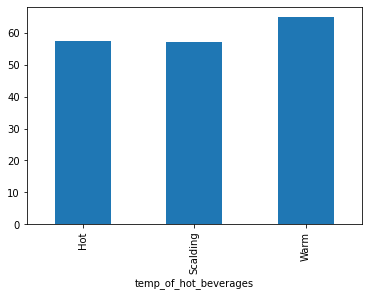

In [83]:
df_clean.groupby(['temp_of_hot_beverages'])['age'].mean().plot.bar()

How much do our subjects drink?  Let's use `.value_counts()` to determine how many instances there are of each "liquor_freq" category, and plot the result.

In [84]:
df_clean['liquor_freq'].value_counts()

Daily           19
Rarely-never     7
Weekly           3
Seasonally       2
Monthly          2
Name: liquor_freq, dtype: int64

<AxesSubplot:>

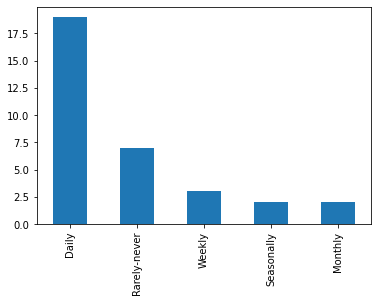

In [85]:
df_clean['liquor_freq'].value_counts().plot.bar()

Let's combine filtering and plotting to look at the distribution of smokers' start and stop ages, amongst subjects who drink scalding beverages.

<AxesSubplot:>

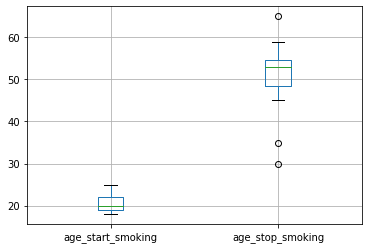

In [86]:
df_clean[df_clean['temp_of_hot_beverages'] == 'Scalding'].boxplot(column=['age_start_smoking','age_stop_smoking'])

Let's use `groupby()` again, this time to look at the means for all continous variables, grouped by education level.

<AxesSubplot:xlabel='education_level'>

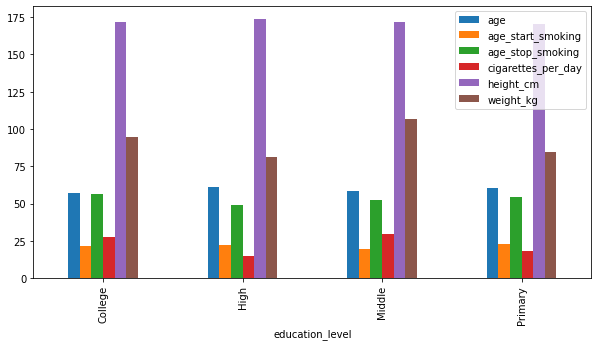

In [87]:
df_clean.groupby(['education_level']).mean().plot.bar(figsize=[10,5])

That's a rather busy graph - let's redraw it, just focusing on smoking start/stop ages.  Do you think there's likely to be a difference in start/stop age across different levels of education?

C:\Users\AI318-New\AppData\Local\Temp\ipykernel_7036\920046199.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_clean.groupby(['education_level'])['age_start_smoking','age_stop_smoking'].mean().plot.bar(figsize=[10,5])


<AxesSubplot:xlabel='education_level'>

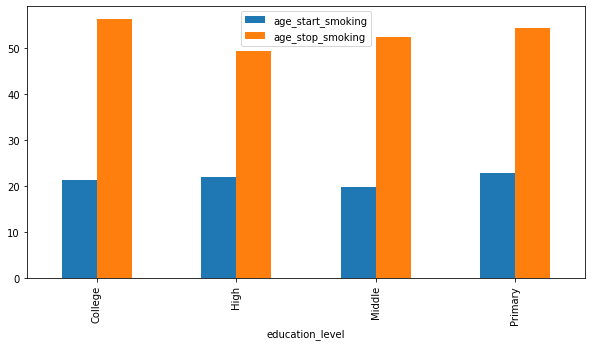

In [88]:
df_clean.groupby(['education_level'])['age_start_smoking','age_stop_smoking'].mean().plot.bar(figsize=[10,5])

We can create scatter plots to look at the interaction between multiple features.  Here, let's look at height and weight.

<AxesSubplot:xlabel='height_cm', ylabel='weight_kg'>

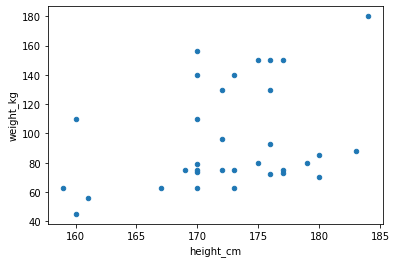

In [89]:
df_clean.plot.scatter('height_cm','weight_kg')

We can use `corr()` to look for correlations within our data.  Without any additional parameters, this will compare all continuous variables in your dataframe.

In [90]:
df_clean.corr()

,age,age_start_smoking,age_stop_smoking,cigarettes_per_day,height_cm,weight_kg
age,1.000000,0.342724,0.145876,-0.141863,-0.050255,-0.136615
age_start_smoking,0.342724,1.000000,-0.005996,-0.303052,0.410189,0.298423
age_stop_smoking,0.145876,-0.005996,1.000000,-0.107352,0.215067,0.112724
cigarettes_per_day,-0.141863,-0.303052,-0.107352,1.000000,-0.176550,0.237404
height_cm,-0.050255,0.410189,0.215067,-0.176550,1.000000,0.341983
weight_kg,-0.136615,0.298423,0.112724,0.237404,0.341983,1.000000


There are lots of ways to create a heatmap from this data.  Here's just one simple one, that doesn't rely on any additional libraries.

In [91]:
df_clean.corr().style.background_gradient(cmap='autumn')

,age,age_start_smoking,age_stop_smoking,cigarettes_per_day,height_cm,weight_kg
age,1.000000,0.342724,0.145876,-0.141863,-0.050255,-0.136615
age_start_smoking,0.342724,1.000000,-0.005996,-0.303052,0.410189,0.298423
age_stop_smoking,0.145876,-0.005996,1.000000,-0.107352,0.215067,0.112724
cigarettes_per_day,-0.141863,-0.303052,-0.107352,1.000000,-0.176550,0.237404
height_cm,-0.050255,0.410189,0.215067,-0.176550,1.000000,0.341983
weight_kg,-0.136615,0.298423,0.112724,0.237404,0.341983,1.000000


__Exercise: Generate a scatter plot of any two continuous variables.__

<AxesSubplot:xlabel='age_start_smoking', ylabel='cigarettes_per_day'>

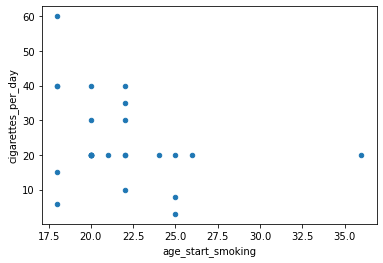

In [92]:
df_clean.plot.scatter('age_start_smoking','cigarettes_per_day')

__Exercise: Plot the distribution of all continuous variables for subjects below 65 and above 65.__ 

<AxesSubplot:>

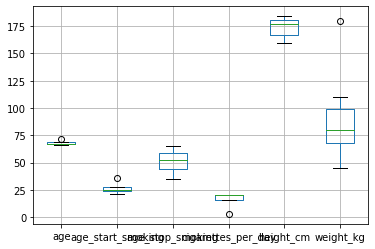

In [93]:
df_clean[df_clean['age'] >= 65].boxplot()

<AxesSubplot:>

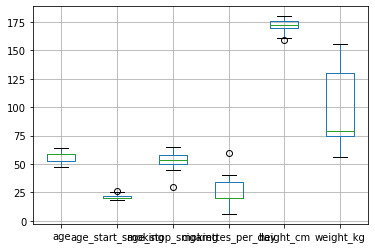

In [94]:
df_clean[df_clean['age'] < 65].boxplot()

<div style="font-size: 1em; margin: 1em 1em 1em 1em; border: 1px solid #86989B; background-color: #8fffff;padding: 1em 1em 1em 1em; ">
<div align="center">
<img src='Imgs/Icon5.png'  width='10%'>

<h2 style="text-align: center;color: Darkgreen">Supervised and Unsupervised</h2>


</div>